In [1]:
!pip install opencv-python
!pip install plotly

In [2]:
import sys
import cv2
import pandas as pd
import numpy as np
from scipy import signal, fftpack

from matplotlib import pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio

In [3]:
np.set_printoptions(threshold=sys.maxsize)
py.init_notebook_mode(connected=True)
pio.renderers.default = 'colab'

In [81]:
signatures_df_loaded = pd.read_hdf('signatures.h5', key='key', mode='r')
signatures_df = signatures_df_loaded
display(signatures_df.head())

,Path,Title,duration,framerate,clipsize,L,W,H,elapsed_time,process_FPS,coarse_sign,confidence,words,fine_sign,Topic,coarse_sign_hashed,confidence_hashed
0,processed_signatures/97f5900df59435bc123061598...,97f5900df59435bc1230615987e24858e9a37f67.flv,183.360000,25.000000,16949959,4585,448,336,11.933491,384.212793,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[68, 68, 71, 68, 66, 68, 68, 66, 67, 65, 65, 6...","[45, 150, 178, 97, 188, 45, 150, 178, 97, 188,...","[28, 90, 3, 90, 36, 12, 2, 109, 88, 19, 85, 24...",troy_achilles_and_hector,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, -71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,processed_signatures/c9cee9c02cc23af3a26ee9548...,c9cee9c02cc23af3a26ee9548b895addd643974f.flv,228.428000,29.969697,17963154,6847,640,360,17.918185,382.125767,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 4, 6, 8, 10, 11, 14, 15, 17, 18, 20, 22...","[121, 121, 118, 121, 121, 69, 17, 18, 136, 142...","[121, 121, 121, 121, 121, 121, 121, 121, 121, ...",scent_of_woman_tango,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, -128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,processed_signatures/46f2e964ae16f5c27fad70d68...,46f2e964ae16f5c27fad70d6849c76616fad7502.flv,170.680000,25.000000,10479741,4268,640,358,11.593056,368.151426,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[121, 121, 121, 121, 121, 121, 121, 121, 121, ...","[121, 121, 121, 121, 121, 121, 121, 121, 121, ...",beautiful_mind_game_theory,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,processed_signatures/37a935b4c21662e183a0dd632...,37a935b4c21662e183a0dd632f40d5fd6900c42b.mp4,42.333333,6.000000,1245480,254,192,144,0.686463,370.012853,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, ...","[46, 44, 44, 44, 45, 46, 43, 46, 46, 46, 45, 4...","[10, 172, 113, 179, 69, 13, 172, 122, 188, 69,...","[93, 80, 241, 125, 86, 239, 209, 114, 170, 28,...",beckham_70_yard_goal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,processed_signatures/84ce12a5fff66f4cd789c90bf...,84ce12a5fff66f4cd789c90bf61156f44fe21fbc.flv,10.880000,12.591837,325907,137,240,180,0.369942,370.327895,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[14, 13, 13, 13, 14, 14, 13, 14, 14, 14, 15, 1...","[197, 207, 68, 1, 234, 197, 207, 68, 2, 234, 1...","[118, 81, 0, 36, 120, 0, 22, 21, 194, 190, 94,...",maradona_hand_of_god,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [82]:
signatures_df[signatures_df['Topic']=='bolt_beijing_100m']['L']

131     979
151    5389
160     979
225    7120
242    5155
254    4165
303    6924
307    4165
332    4169
386    1596
456     495
519    4165
Name: L, dtype: int64

In [90]:
index1 = 456

In [91]:
shapes_dict = {'Words':5, 'Confidence':1, 'Coarse':243, 'Fine':76}

coarse_single_df1 = signatures_df['coarse_sign'][index1]
fine_single_df1 = signatures_df['fine_sign'][index1]
confidence_single_df1 = signatures_df['confidence'][index1]
words_single_df1 = signatures_df['words'][index1]
title1 = signatures_df['Title'][index1]
topic1 = signatures_df['Topic'][index1]

In [92]:
print(topic1, title1, coarse_single_df1.shape, fine_single_df1.shape, words_single_df1.shape, confidence_single_df1.shape)

bolt_beijing_100m 5b1b41404d1bad5d231bd8c7fdbae109e0ea1fc2.flv (13365,) (37544,) (2470,) (494,)


In [93]:
def tokenize(doc):
    """Extract tokens from doc.

    This uses a simple regex that matches word characters to break strings
    into tokens. For a more principled approach, see CountVectorizer or
    TfidfVectorizer.
    """
    return np.unique(doc, return_counts=True)

def token_freqs(doc):
    """Extract a dict mapping tokens from doc to their occurrences."""
    freq_dict = defaultdict(int)
    values , frequencies = tokenize(doc)

    for A, B in zip(values, frequencies):
        freq_dict[str(A)] = B

    return freq_dict

from collections import defaultdict
from sklearn.feature_extraction import FeatureHasher
n=256
data = signatures_df['coarse_sign'][index1]
h = FeatureHasher(n_features=n, input_type="dict")
f = h.fit_transform(token_freqs(d) for d in data).toarray().astype(int)
L = signatures_df['L'][index1]
framerate = signatures_df['framerate'][index1]
print(data.shape, L, framerate, data.shape[0]/L, data.shape[0]/243, L/(data.shape[0]/243))

(13365,) 495 15.0 27.0 55.0 9.0


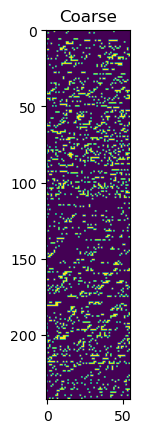

In [103]:
title = 'Coarse'
shape = shapes_dict[title]
df = coarse_single_df1
cv2.imwrite("images/coarse.png", np.array(df).reshape(shape,-1)*255)

plt.imshow(np.array(df).reshape(shape,-1))
plt.title(title)
plt.show()

Trim: 0


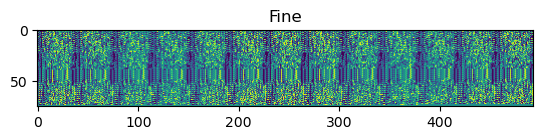

In [104]:
n=1
title = 'Fine'
shape = shapes_dict[title]
df = fine_single_df1

trim = df.shape[0]%(shape * n)
if trim > 0:
    img = np.array(df)[:-trim].reshape(shape * n, -1)
else:
    img = np.array(df).reshape(76*n,-1)
print('Trim:', trim)

cv2.imwrite("images/fine.png", img)
plt.imshow(img)
plt.title(title)
plt.show()

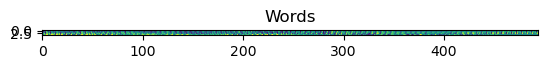

In [97]:
title = 'Words'
shape = shapes_dict[title]
df = words_single_df1
img = np.array(df).reshape(shape,-1)

cv2.imwrite("words.png", img)
plt.imshow(img)
plt.title(title)
plt.show()

In [19]:
title = 'Confidence'
shape = shapes_dict[title]
df = confidence_single_df1

fig = go.Figure(data=go.Scatter(x=[n for n in range(len(df))], 
                        y=df,
                        marker_color='indianred', text="confidence"))
fig.update_layout({"title": f'Confidence signature for {title1}',
                   "xaxis": {"title":"Frames"},
                   "yaxis": {"title":"Confidence"},
                   "showlegend": False},
                 height=600, width=800)
fig.show()

In [ ]:
from plotly.subplots import make_subplots

title = 'Words'
shape = shapes_dict[title]
df = words_single_df1

fig = make_subplots(rows=shape, cols=1)
for i in range(shape):
    fig.add_trace(go.Scatter(x=[n for n in range(np.array(df).reshape(shape,-1)[i].shape[0])], 
                             y=np.array(df).reshape(shape,-1)[i],
                             text=title),
                            row=i+1, col=1
                    )
fig.update_layout( title_text="Side By Side Subplots")

fig.update_layout({"title": f'{title} signature for {title1}',
                   "showlegend": False},
                height=600, width=800)
fig.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
framerate = 30 
fig = go.Figure()
for topic in signatures_df['Topic'].unique():
    print(topic)
    
    topic_df = signatures_df[signatures_df['Topic']==topic]
    
    
    for i in topic_df.index:
        title = signatures_df['Title'][i]
        signal_type = 'Coarse'
        shape = shapes_dict[signal_type]
        df = signatures_df['coarse_sign'][i]

        signature = np.array(df).reshape(shape,-1)[0]
        signature = signature - np.mean(signature)
        
        l = int(len(signature))
        x = np.linspace(0, l, l, endpoint=False)
        y = signature[:l] #np.cos(-x**2/6.0)
        f = signal.resample(y, int(framerate*100))
        xnew = np.linspace(0, l, int(framerate*100), endpoint=False)

        for j in range(shape):

            fft = np.fft.fft(f)
            fftfreq = np.fft.fftfreq(len(f))

            fig.add_trace(go.Scatter(x=abs(fftfreq),y=abs(fft),name=topic, mode="lines",))  

fig.show()


In [ ]:
topic_df = signatures_df[signatures_df['Topic']=='obama_kicks_door']
topic_df[['L','framerate']]

In [ ]:
sig1.shape

In [ ]:

i1 = 12
i2 = 125
resampling_resolution = 1000
df1 = signatures_df['coarse_sign'][i1]
df2 = signatures_df['coarse_sign'][i2]

sig1 = np.array(df1).reshape(shape,-1)
l1 = int(len(sig1))
x1 = np.linspace(0, l1, l1, endpoint=False)
y1 = sig1[:l1] 
f1 = signal.resample(y1, int(l1*resampling_resolution/framerate))
xnew1 = np.linspace(0, l1, int(l1*resampling_resolution/framerate), endpoint=False)

sig2 = np.array(df2).reshape(shape,-1)
l2 = int(len(sig2))
x2 = np.linspace(0, l2, l2, endpoint=False)
y2 = sig2[:l2] 
f2 = signal.resample(y2, int(l2*resampling_resolution/framerate))
xnew2 = np.linspace(0, l2, int(l2*resampling_resolution/framerate), endpoint=False)

corr = signal.correlate(f1, f2)
xcorr = np.linspace(0, l1+l2, int((l1+l2)*resampling_resolution/framerate), endpoint=False)

In [ ]:
framerate1 = signatures_df['framerate'][i1]
framerate2 = signatures_df['framerate'][i2]
print(f'Frame number: signal A: {l1}, signal B: {l2}')
print(f'Framerates: signal A: {framerate1}, signal B: {framerate2}')

In [ ]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x=x1,y=sig1,name='sig1', mode="lines"))
fig.add_trace(go.Scatter(x=xnew1,y=f1,name=f'Signature A ({framerate}fps)', mode="lines"))
fig.add_trace(go.Scatter(x=x1,y=f1,name=f'Signature A ({framerate1}fps)', mode="lines"))
fig.add_trace(go.Scatter(x=xnew2,y=f2,name=f'Signature B({framerate}fps)', mode="lines"))
#fig.add_trace(go.Scatter(x=x2,y=f2,name=f'Signature B({framerate2}fps)', mode="lines"))
fig.update_layout( autosize=False,
                    width=800,
                    height=550,
                   margin=dict(
                        l=10,
                        r=10,
                        b=10,
                        t=55,
                        pad=4
                    ),
                    paper_bgcolor="LightSteelBlue",
                                  title={
                                        'text': "Confidence signature matching: resampling",
                                        'y':0.95,
                                        'x':0.5,
                                        'xanchor': 'center',
                                        'yanchor': 'top'},
                    xaxis_title="Frame",
                    yaxis_title="Confidence"
                )
fig.show()


In [ ]:
lags = signal.correlation_lags(f1.size, f2.size, mode="full")

In [ ]:
correlation = signal.correlate(f1, f2, mode="full")
lag = lags[np.argmax(correlation)]
print(lag)

In [ ]:
def get_max_correlation(original, match):
    z = signal.fftconvolve(original, match[::-1])
    lags = np.arange(z.size) - (match.size - 1)
    return lags[np.argmax(np.abs(z))],z

In [ ]:
shift, z = get_max_correlation(f1,f2)
xnew3 = xnew1 - shift
 
fft1 = np.fft.fft(f1)
fftfreq1 = np.fft.fftfreq(len(xnew1))
fft2 = np.fft.fft(f2)
fftfreq2 = np.fft.fftfreq(len(xnew2))



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=xnew1,y=f1,name='f1', mode="lines"))
fig.add_trace(go.Scatter(x=xnew2,y=f2,name='f2', mode="lines"))
fig.add_trace(go.Scatter(x=xnew3,y=f1,name='f2_shifted', mode="lines"))
fig.add_trace(go.Scatter(x=xnew1,y=z,name='z', mode="lines"))
fig.show()

In [ ]:
fig = go.Figure()
shift, z = get_max_correlation(abs(fft2),abs(fft1))

fig.add_trace(go.Scatter(x=abs(fftfreq1),y=abs(fft1),name='f1', mode="lines",))  
fig.add_trace(go.Scatter(x=abs(fftfreq2),y=abs(fft2),name='f2', mode="lines",))  
fig.add_trace(go.Scatter(x=abs(fftfreq2)+shift,y=abs(fft2),name='z', mode="lines",))  
fig.show()

In [ ]:
shift